# Cyclistic Member Behavior Analysis

### Google Data Analytics Certification Capstone Project

Author: Likhith Sri Vatsa Uppada 
Date: 10/9/2023 


This following ipynb file describes consists of Data Preparation, Cleaning and Analysis tasks in the Google Data Anaytics Capstone Project. I was provided with a bike-share company's first quarter ride data. I will be performing exploratory analysis, cleaning, and analysis to see if there are any insights and/or connections between the annual members and casual members of Cyclistic's service. 

In [40]:
import pandas as pd
import numpy as np
import math 
df=pd.read_csv("C:/Users/luppada/Documents/Projects/data/trips_2020_Q1.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


The columns 'end_station_name','end_station_id','end_lat' and 'end_lng' have null values.

    The data also has multiple columns with mutliple datapoints. I will now find how many unique values are in each column. I will also change the station ids to object format to prevent any aggregation operations on them.

In [42]:
df['start_station_id']=df['start_station_id'].astype('object')
df['end_station_id']=df['end_station_id'].astype('object')
df.dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member


In [10]:
colnames = df.columns
for i in colnames:
    print ("Number of unique values in", i, "are: ", df[i].nunique())
    if len(df[i].unique())<=10:
        print("The unique values are: ", (df[i].unique()))

Number of unique values in ride_id are:  426887
Number of unique values in rideable_type are:  1
The unique values are:  ['docked_bike']
Number of unique values in started_at are:  399265
Number of unique values in ended_at are:  399532
Number of unique values in start_station_name are:  607
Number of unique values in start_station_id are:  607
Number of unique values in end_station_name are:  602
Number of unique values in end_station_id are:  602
Number of unique values in start_lat are:  518
Number of unique values in start_lng are:  484
Number of unique values in end_lat are:  514
Number of unique values in end_lng are:  482
Number of unique values in member_casual are:  2
The unique values are:  ['member' 'casual']


I will create a column called ride_time, which will measure the duration of each ride. To create that column I must first convert the started_at and ended_at columns to datetime datatype. Then I will break the started_at and ended_at columns to months, days and hours for analysis in the future.

In [11]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_time']=(df['ended_at']-df['started_at']).dt.total_seconds()
df['started_month']=df['started_at'].dt.month
df['started_day']=df['started_at'].dt.day
df['started_hour']=df['started_at'].dt.hour
df['ended_month']=df['ended_at'].dt.month
df['ended_day']=df['ended_at'].dt.day
df['ended_hour']=df['ended_at'].dt.hour
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,started_month,started_day,started_hour,ended_month,ended_day,ended_hour
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,451.0,1,21,20,1,21,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,223.0,1,30,14,1,30,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,171.0,1,9,19,1,9,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,529.0,1,6,16,1,6,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,332.0,1,30,8,1,30,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,1.0,3,10,10,3,10,10
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,2888.0,3,7,15,3,7,16
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,1551.0,3,1,13,3,1,13
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,633.0,3,7,18,3,7,18


In [12]:
print("The size of the dataframe is: ",df.shape)
print(df[df['ride_time']<0].shape)


The size of the dataframe is:  (426887, 20)
(117, 20)


The size of the dataframe ride is way too big to be impacted by removing these rows.

In [13]:

df=df[df['ride_time']>=0]
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_time,started_month,started_day,started_hour,ended_month,ended_day,ended_hour
count,426770.000000,426770.000000,426770.00000,426770.000000,4.267700e+05,426770.000000,426770.000000,426770.000000,426770.000000,426770.000000,426770.000000
mean,41.897849,-87.644147,41.89800,-87.644244,1.327275e+03,1.998636,14.190848,13.228587,1.998875,14.191087,13.412780
std,0.038085,0.022661,0.03832,0.022657,3.714758e+04,0.820322,8.845090,4.611293,0.820483,8.844948,4.646857
min,41.736600,-87.774700,41.73660,-87.774700,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,41.880300,-87.655000,41.88030,-87.655500,3.290000e+02,1.000000,7.000000,9.000000,1.000000,7.000000,9.000000
50%,41.890600,-87.639900,41.89060,-87.640800,5.500000e+02,2.000000,13.000000,14.000000,2.000000,13.000000,14.000000
75%,41.915700,-87.629500,41.91600,-87.629500,9.500000e+02,3.000000,22.000000,17.000000,3.000000,22.000000,17.000000
max,42.064900,-87.549400,42.06490,-87.549400,9.387024e+06,3.000000,31.000000,23.000000,5.000000,31.000000,23.000000


In [14]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_time,started_month,started_day,started_hour,ended_month,ended_day,ended_hour
count,426770.000000,426770.000000,426770.00000,426770.000000,4.267700e+05,426770.000000,426770.000000,426770.000000,426770.000000,426770.000000,426770.000000
mean,41.897849,-87.644147,41.89800,-87.644244,1.327275e+03,1.998636,14.190848,13.228587,1.998875,14.191087,13.412780
std,0.038085,0.022661,0.03832,0.022657,3.714758e+04,0.820322,8.845090,4.611293,0.820483,8.844948,4.646857
min,41.736600,-87.774700,41.73660,-87.774700,0.000000e+00,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,41.880300,-87.655000,41.88030,-87.655500,3.290000e+02,1.000000,7.000000,9.000000,1.000000,7.000000,9.000000
50%,41.890600,-87.639900,41.89060,-87.640800,5.500000e+02,2.000000,13.000000,14.000000,2.000000,13.000000,14.000000
75%,41.915700,-87.629500,41.91600,-87.629500,9.500000e+02,3.000000,22.000000,17.000000,3.000000,22.000000,17.000000
max,42.064900,-87.549400,42.06490,-87.549400,9.387024e+06,3.000000,31.000000,23.000000,5.000000,31.000000,23.000000


The minimum value in the ride_time for casual riders shows a negative value. This represents an irregularity in the data collection process as the ride time can be only zero at a minimum because time as we know is uniderctional.  For now we will focus removing these values depending how many of these values exist in the dataframe as they might skew further analysis.

I will now break the data into two dataframes for member specific analysis. Then I will briefly study the features both dataframes. I will be using the describe function to study the change in various features like

In [15]:
memberdf = df[df['member_casual']=='member']
casualdf = df[df['member_casual']=='casual']


print("Ride time analysis for annual members\n\n",memberdf.describe())
print('---'*20)
print("\n Ride time analysis for casual riders\n\n",casualdf.describe())


Ride time analysis for annual members

            start_lat      start_lng        end_lat        end_lng  \
count  378407.000000  378407.000000  378407.000000  378407.000000   
mean       41.897783     -87.644376      41.897917     -87.644483   
std         0.037923       0.022132       0.038198       0.022103   
min        41.736600     -87.774700      41.736600     -87.774700   
25%        41.880300     -87.654800      41.880300     -87.654800   
50%        41.890600     -87.641100      41.890600     -87.641100   
75%        41.915700     -87.629900      41.916000     -87.629900   
max        42.064900     -87.549400      42.064900     -87.549400   

          ride_time  started_month    started_day   started_hour  \
count  3.784070e+05  378407.000000  378407.000000  378407.000000   
mean   7.606268e+02       1.945810      14.301554      13.134691   
std    1.375753e+04       0.813757       8.833795       4.695338   
min    1.000000e+00       1.000000       1.000000       0.000000  

In [16]:
casualdf=casualdf.sort_values(by=['ride_time'])
memberdf=memberdf.sort_values(by=['ride_time'])


The number of times bikes were used -  426770
The number of times bikes were used by casual members -  48363
The number of times bikes were used annual members -  378407


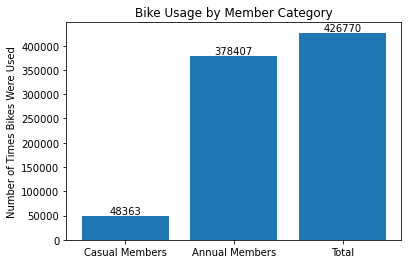

In [17]:
counts = [ casualdf.shape[0], memberdf.shape[0],df.shape[0]]

print("The number of times bikes were used - ",counts[2])
print("The number of times bikes were used by casual members - ",counts[0])
print("The number of times bikes were used annual members - ",counts[1])


# Create labels for the categories
categories = [ 'Casual Members', 'Annual Members','Total']

# Create a bar chart
plt.bar(categories, counts)

# Add labels and title
plt.ylabel('Number of Times Bikes Were Used')
plt.title('Bike Usage by Member Category')

# Add data values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


The number of times bikes were used -  143884
The number of times bikes were used by casual members -  7785
The number of times bikes were used annual members -  136099


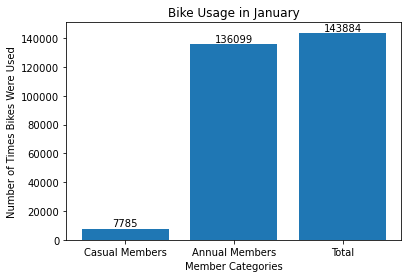

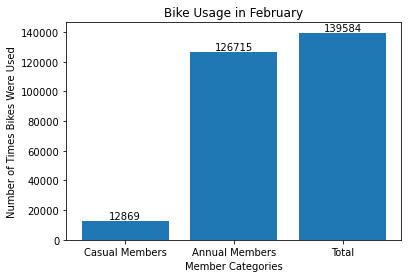

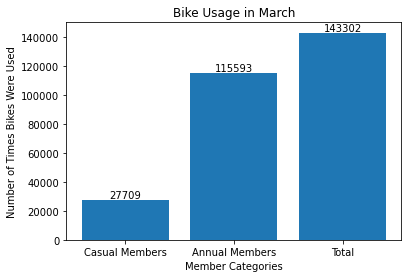

In [18]:
counts = [ casualdf[casualdf['started_month']==1].shape[0], memberdf[memberdf['started_month']==1].shape[0],df[df['started_month']==1].shape[0]]

print("The number of times bikes were used - ",counts[2])
print("The number of times bikes were used by casual members - ",counts[0])
print("The number of times bikes were used annual members - ",counts[1])


# Create labels for the categories
categories = [ 'Casual Members', 'Annual Members','Total']

# Create a bar chart
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Member Categories')
plt.ylabel('Number of Times Bikes Were Used')
plt.title('Bike Usage in January')

# Add data values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()
counts = [ casualdf[casualdf['started_month']==2].shape[0], memberdf[memberdf['started_month']==2].shape[0],df[df['started_month']==2].shape[0]]
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Member Categories')
plt.ylabel('Number of Times Bikes Were Used')
plt.title('Bike Usage in February')

# Add data values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()
counts = [ casualdf[casualdf['started_month']==3].shape[0], memberdf[memberdf['started_month']==3].shape[0],df[df['started_month']==3].shape[0]]
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Member Categories')
plt.ylabel('Number of Times Bikes Were Used')
plt.title('Bike Usage in March')

# Add data values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

To start the analysis process, a good point to start is by checking if the various columns in the dataframes have any correlation. 
    One of the benefits of the separating the data into two dataframes based on rider type is that we will find the correlations relevant to that specific type. 

<AxesSubplot:>

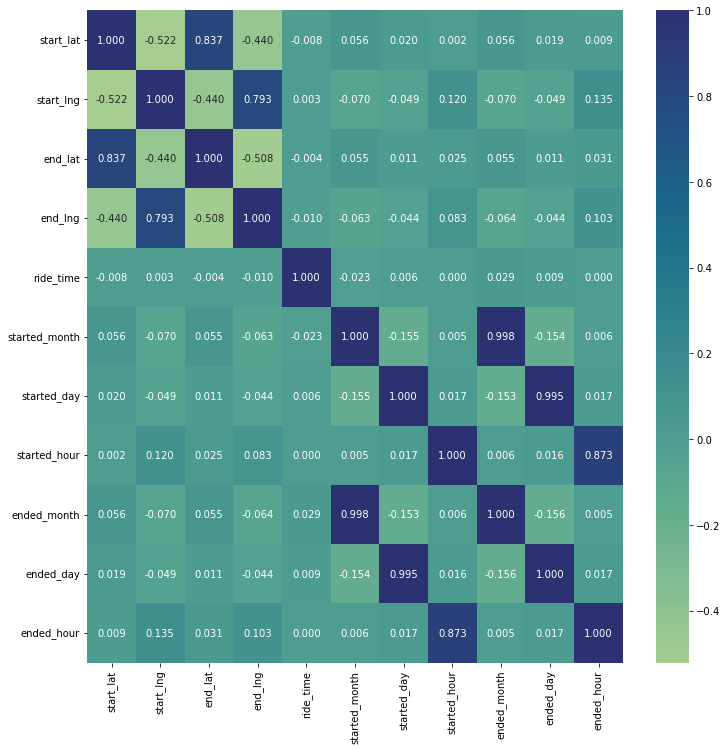

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
correlation = casualdf.corr(method='pearson')
sns.heatmap(correlation, annot = True, cmap = 'crest',fmt=".3f")

This heatmap shows the correlation between various columns with numerical features. While there seems to be noticeable positive and negative correlation between longitude and latitude features, we will not focusing on them. We will be mainly focusing on the correlations between various date features and date features and other columns.

The started_month and ended_month have a correlation of 0.998, started_day and ended_day have a correlation of 0.995 and started_hour and ended_hour have a correlation of 0.873.

This shows that it is not always the case that trips do not always end on the same day, month or the hour they started. 

<AxesSubplot:>

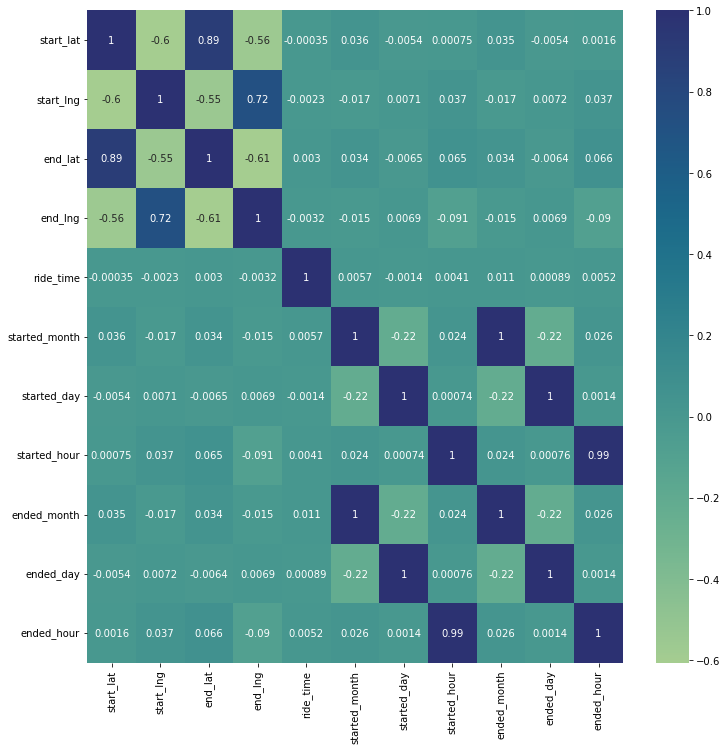

In [20]:
plt.figure(figsize=(12,12))
correlation = memberdf.corr(method='pearson')
sns.heatmap(correlation, annot = True, cmap = 'crest')


<AxesSubplot:>

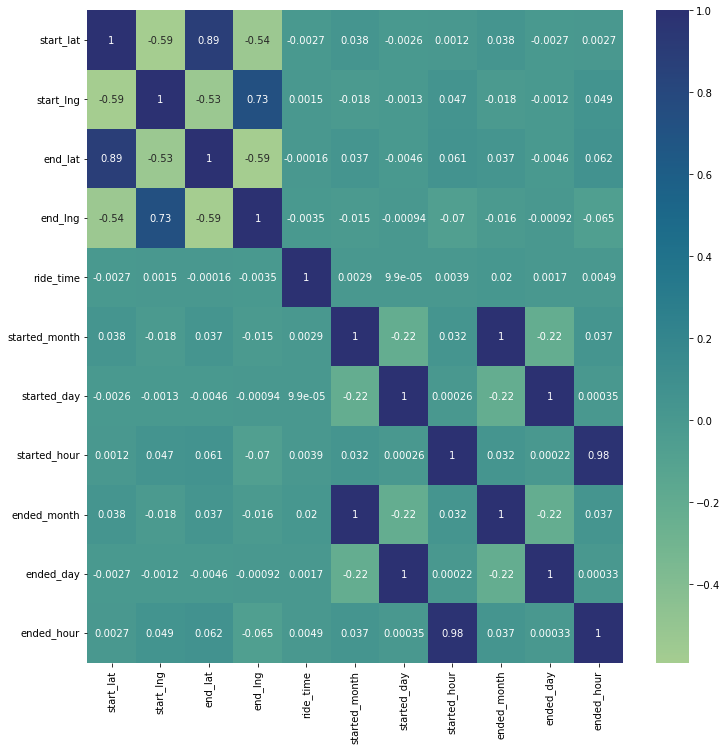

In [21]:
plt.figure(figsize=(12,12))
correlation = df.corr(method='pearson')
sns.heatmap(correlation, annot = True, cmap = 'crest')


I will now investigate how often the bikes are used over a month.

In [22]:
df.loc[:,'monthdiff']=df['ended_month']-df['started_month']
monthdict=df[df['monthdiff']>0].value_counts("monthdiff").to_dict()
casualdf['monthdiff']=casualdf['ended_month']-casualdf['started_month']
cmonthdict=casualdf[casualdf['monthdiff']>0].value_counts("monthdiff").to_dict()
memberdf['monthdiff']=memberdf['ended_month']-memberdf['started_month']
mmonthdict=memberdf[memberdf['monthdiff']>0].value_counts("monthdiff").to_dict()
for i in monthdict:
    print(monthdict[i], "bikes were used over", i,"months.")
print("\n")
for i in cmonthdict:
    print(cmonthdict[i], "bikes were used by casual riders over", i,"months.")
print("\n")
for i in mmonthdict:
    print(mmonthdict[i], "bikes were used by annual members over", i,"months.")


73 bikes were used over 1 months.
10 bikes were used over 2 months.
3 bikes were used over 3 months.


54 bikes were used by casual riders over 1 months.
8 bikes were used by casual riders over 2 months.
3 bikes were used by casual riders over 3 months.


19 bikes were used by annual members over 1 months.
2 bikes were used by annual members over 2 months.


C:\Users\luppada\AppData\Local\Temp\ipykernel_7752\3344424095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'monthdiff']=df['ended_month']-df['started_month']


I will now investigate how often the bikes are used over a month.

In [23]:
df.loc[:,'monthdiff']=df['ride_time']/(3600*24*30)

df.loc[(df['monthdiff']<0)&(df['started_month']!=2),'monthdiff']+=31

df['monthdiff']=df['monthdiff'].round(0)
df=df.sort_values(by='monthdiff')
#2020 is a leap year
df.loc[(df['monthdiff']<0)&(df['started_month']==2),'monthdiff']+=29 

monthdict=df[df['monthdiff']>0].value_counts("monthdiff").to_dict()

monthdict=dict(sorted(monthdict.items()))

for i in monthdict:
    cnt = i
    if cnt<1:
        print(monthdict[i], "bikes were used for under a month.")
    else:
        print(monthdict[i], "bikes were used for over",i,"  months.")
print("\n")

C:\Users\luppada\AppData\Local\Temp\ipykernel_7752\559548574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'monthdiff']=df['ride_time']/(3600*24*30)
C:\Users\luppada\AppData\Local\Temp\ipykernel_7752\559548574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monthdiff']=df['monthdiff'].round(0)


28 bikes were used for over 1.0   months.
7 bikes were used for over 2.0   months.
2 bikes were used for over 3.0   months.
1 bikes were used for over 4.0   months.




Investigating the hour-wise breakdown of bike usage.

In [24]:
df['hourdiff']=df['ride_time']/3600
df['hourdiff']=df['hourdiff'].round(0)
df=df.sort_values(by='hourdiff')
df.loc[(df['hourdiff']<0),'hourdiff']+=24

hourdict=df[df['hourdiff']>0].value_counts("hourdiff").to_dict()
hourdict=dict(sorted(hourdict.items()))

for i in hourdict:
    cnt = i
    if cnt==1:
        print(hourdict[i],"bikes were used for", i,"hour." )
    elif cnt<24:
        print(hourdict[i], "bikes were used for", i,"hours.")
print("\n")

28594 bikes were used for 1.0 hour.
2103 bikes were used for 2.0 hours.
586 bikes were used for 3.0 hours.
157 bikes were used for 4.0 hours.
112 bikes were used for 5.0 hours.
84 bikes were used for 6.0 hours.
65 bikes were used for 7.0 hours.
53 bikes were used for 8.0 hours.
63 bikes were used for 9.0 hours.
51 bikes were used for 10.0 hours.
37 bikes were used for 11.0 hours.
21 bikes were used for 12.0 hours.
17 bikes were used for 13.0 hours.
25 bikes were used for 14.0 hours.
39 bikes were used for 15.0 hours.
22 bikes were used for 16.0 hours.
35 bikes were used for 17.0 hours.
22 bikes were used for 18.0 hours.
23 bikes were used for 19.0 hours.
25 bikes were used for 20.0 hours.
13 bikes were used for 21.0 hours.
16 bikes were used for 22.0 hours.
19 bikes were used for 23.0 hours.




Investigating the week-wise breakdown of bike usage.

In [25]:
df['weekdiff']=df['ride_time']/(3600*24*7)
df['weekdiff']=df['weekdiff'].round(0)
df=df.sort_values(by='weekdiff')

weekdict=df[df['weekdiff']>=0].value_counts("weekdiff").to_dict()

weekdict=dict(sorted(weekdict.items()))

for i in weekdict:
    cnt = i
    if cnt==1:
        print(weekdict[i],"bikes were used for", i,"week." )
    elif cnt <1:
        print(weekdict[i],"bikes were used for under a week")
    elif cnt<=5:
        print(weekdict[i], "bikes were used for",i,"weeks.")
print("\n")

426652 bikes were used for under a week
71 bikes were used for 1.0 week.
11 bikes were used for 2.0 weeks.
7 bikes were used for 3.0 weeks.
13 bikes were used for 4.0 weeks.
1 bikes were used for 5.0 weeks.




Investigating the day-wise breakdown of bike usage for bikes used under a month.

In [26]:
df['daydiff']=df['ride_time']/(3600*24)

df.loc[(df['daydiff']<0)&(df['started_month']!=2),'daydiff']+=31

df['daydiff']=df['daydiff'].round(0)
df=df.sort_values(by='daydiff')
#2020 is a leap year
df.loc[(df['daydiff']<0)&(df['started_month']==2),'daydiff']+=29 

daydict=df[df['daydiff']>0].value_counts("daydiff").to_dict()


for i in daydict:
    cnt = i
    if cnt<1:
        print(daydict[i], "bikes were used for under a day.")
    elif cnt<31:
        print(daydict[i], "bikes were used for over",i,"  days.")
print("\n")

334 bikes were used for over 1.0   days.
82 bikes were used for over 2.0   days.
28 bikes were used for over 3.0   days.
23 bikes were used for over 4.0   days.
16 bikes were used for over 5.0   days.
9 bikes were used for over 7.0   days.
8 bikes were used for over 6.0   days.
7 bikes were used for over 9.0   days.
6 bikes were used for over 10.0   days.
4 bikes were used for over 26.0   days.
3 bikes were used for over 11.0   days.
2 bikes were used for over 19.0   days.
2 bikes were used for over 30.0   days.
2 bikes were used for over 27.0   days.
2 bikes were used for over 23.0   days.
2 bikes were used for over 25.0   days.
2 bikes were used for over 12.0   days.
2 bikes were used for over 16.0   days.
2 bikes were used for over 15.0   days.
2 bikes were used for over 8.0   days.
1 bikes were used for over 21.0   days.
1 bikes were used for over 18.0   days.
1 bikes were used for over 13.0   days.
1 bikes were used for over 29.0   days.
1 bikes were used for over 28.0   days.
1 b

In [27]:
df['minutediff']=df['ride_time']/(60)

#df.loc[(df['minutediff']<0)&(df['started_month']!=2),'daydiff']+=31

df['minutediff']=df['minutediff'].round(0)
df=df.sort_values(by='minutediff')
#2020 is a leap year
#df.loc[(df['minutediff']<0)&(df['started_month']==2),'daydiff']+=29 

minutedict=df[df['minutediff']>=0].value_counts("minutediff").to_dict()


for i in minutedict:
    cnt = i
    if cnt<1:
        print(minutedict[i], "bikes were used for less than a minute.")
    elif cnt<60:
        print(minutedict[i], "bikes were used for over",i,"minutes.")
print("\n")

33075 bikes were used for over 6.0 minutes.
32994 bikes were used for over 5.0 minutes.
31620 bikes were used for over 4.0 minutes.
29652 bikes were used for over 7.0 minutes.
27072 bikes were used for over 8.0 minutes.
24569 bikes were used for over 9.0 minutes.
22781 bikes were used for over 3.0 minutes.
22027 bikes were used for over 10.0 minutes.
18485 bikes were used for over 11.0 minutes.
16796 bikes were used for over 12.0 minutes.
14353 bikes were used for over 13.0 minutes.
12843 bikes were used for over 14.0 minutes.
11056 bikes were used for over 15.0 minutes.
10716 bikes were used for over 2.0 minutes.
9675 bikes were used for over 16.0 minutes.
8614 bikes were used for over 17.0 minutes.
7745 bikes were used for over 18.0 minutes.
6752 bikes were used for over 19.0 minutes.
6437 bikes were used for less than a minute.
6335 bikes were used for over 20.0 minutes.
5542 bikes were used for over 21.0 minutes.
5417 bikes were used for over 22.0 minutes.
4718 bikes were used for 

In [35]:
station = {}
for i in df['start_station_name'].unique():
    count = (df['start_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("Top 10 popular start locations")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular start locations")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

station = {}
for i in df['end_station_name'].unique():
    count = (df['end_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("\n Top 10 popular end locations")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular end locations")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

  

Top 10 popular start locations
Canal St & Adams St 7813
Clinton St & Madison St 6797
Clinton St & Washington Blvd 5941
Kingsbury St & Kinzie St 4626
Columbus Dr & Randolph St 4425
Franklin St & Monroe St 3711
HQ QR 3650
Canal St & Madison St 3637
Clinton St & Lake St 3580
Larrabee St & Kingsbury St 3550

 Top 10 least popular start locations
Phillips Ave & 83rd St 1
Bennett Ave & 79th St 1
Kenton Ave & Madison St 1
Halsted St & 69th St 2
May St & 69th St 2
Racine Ave & 61st St 2
Central Park Blvd & 5th Ave 2
Carpenter St & 63rd St 2
Laramie Ave & Gladys Ave 2
Central Ave & Harrison St 2

 Top 10 popular end locations
Canal St & Adams St 8323
Clinton St & Washington Blvd 7166
Clinton St & Madison St 6854
Kingsbury St & Kinzie St 4615
Michigan Ave & Washington St 4227
Franklin St & Monroe St 3748
Canal St & Madison St 3706
HQ QR 3650
Clinton St & Lake St 3646
St. Clair St & Erie St 3618

 Top 10 least popular end locations
South Chicago Ave & 83rd St 1
Kenton Ave & Madison St 1
Bennett A

In [36]:
station = {}
for i in casualdf['start_station_name'].unique():
    count = (casualdf['start_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("Top 10 popular start locations among casual users")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular start locations among casual users")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

station = {}
for i in casualdf['end_station_name'].unique():
    count = (casualdf['end_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("\n Top 10 popular end locations among casual users")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular end locations among casual users")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

Top 10 popular start locations among casual users
HQ QR 3649
Lake Shore Dr & Monroe St 1590
Streeter Dr & Grand Ave 1530
Shedd Aquarium 998
Millennium Park 779
Michigan Ave & Oak St 631
Theater on the Lake 567
Michigan Ave & Washington St 495
Dusable Harbor 490
Adler Planetarium 465

 Top 10 least popular start locations among casual users
Wentworth Ave & 63rd St 1
Laramie Ave & Kinzie St 1
Kostner Ave & Adams St 1
Evans Ave & 75th St 1
Halsted St & 69th St 1
State St & 29th St 1
Exchange Ave & 79th St 1
Sacramento Blvd & Franklin Blvd 1
Halsted St & 59th St 1
Rainbow Beach 1

 Top 10 popular end locations among casual users
HQ QR 3648
Streeter Dr & Grand Ave 1856
Lake Shore Dr & Monroe St 1269
Millennium Park 1114
Shedd Aquarium 821
Michigan Ave & Oak St 738
Theater on the Lake 729
Michigan Ave & Washington St 555
Wabash Ave & Grand Ave 501
Lake Shore Dr & North Blvd 485

 Top 10 least popular end locations among casual users
Kenton Ave & Madison St 1
Wolcott Ave & Fargo Ave 1
Kostner

In [37]:
station = {}
for i in memberdf['start_station_name'].unique():
    count = (memberdf['start_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("Top 10 popular start locations among annual customers")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular start locations among annual customers")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

station = {}
for i in memberdf['end_station_name'].unique():
    count = (memberdf['end_station_name']==i).sum()
    station[i]=count
    
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=True))
count=0
print("\n Top 10 popular end locations among annual customers")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break
station=dict(sorted(station.items(),key=lambda item: item[1],reverse=False))
count=0
print("\n Top 10 least popular end locations among annual customers")
for key,value in station.items():
    print(key,value)
    count+=1
    if count == 10:
        break

Top 10 popular start locations among annual customers
Canal St & Adams St 7586
Clinton St & Madison St 6546
Clinton St & Washington Blvd 5823
Kingsbury St & Kinzie St 4491
Columbus Dr & Randolph St 4099
Franklin St & Monroe St 3580
Canal St & Madison St 3496
Clinton St & Lake St 3404
Larrabee St & Kingsbury St 3374
Daley Center Plaza 3094

 Top 10 least popular start locations among annual customers
South Chicago Ave & 83rd St 1
Phillips Ave & 83rd St 1
HQ QR 1
Marshfield Ave & 59th St 1
Ashland Ave & 63rd St 1
Halsted St & 69th St 1
Phillips Ave & 79th St 1
May St & 69th St 1
Bennett Ave & 79th St 1
Central Ave & Harrison St 1

 Top 10 popular end locations among annual customers
Canal St & Adams St 8158
Clinton St & Washington Blvd 7010
Clinton St & Madison St 6644
Kingsbury St & Kinzie St 4495
Michigan Ave & Washington St 3672
Franklin St & Monroe St 3613
Canal St & Madison St 3517
Clinton St & Lake St 3463
St. Clair St & Erie St 3301
Daley Center Plaza 3257

 Top 10 least popular e

We now have enough information to work have a clear understanding of how the behaviour varies between members and annual customers.

I will not export the datasets into a csv form to visualize using Tableau.

In [38]:
df.to_csv('C:/Users/luppada/Documents/Projects/data/trips_2020_Q1_clean.csv', index=False)
casualdf.to_csv('C:/Users/luppada/Documents/Projects/data/Q1_casualdf_clean.csv', index=False)
memberdf.to_csv('C:/Users/luppada/Documents/Projects/data/Q1_memberdf_clean.csv', index=False)
